In [2]:
import math
from collections import Counter 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
from sklearn import neighbors, datasets

n_neighbors = 10

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [79]:
class KNNClassifier():
    X=None
    y=None
    n_neighbors=0
    
    def __init__(self, n_neighbors=15):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        self.X=np.array(X)
        self.y=np.array(y)
    
    def predict_one(self, p):
        distance_array=np.array(list(map(lambda o: math.dist(p, o), self.X)))
        argsorted=np.argsort(distance_array)
        neighbours = argsorted[:self.n_neighbors]
        neighbour_labels = y[neighbours]
        occurence_count = Counter(neighbour_labels)
        most_frequent = occurence_count.most_common(1)[0][0]
        return most_frequent
        
    def predict(self, X):
        y_hat = np.array(list(map(self.predict_one, X)))
        return y_hat

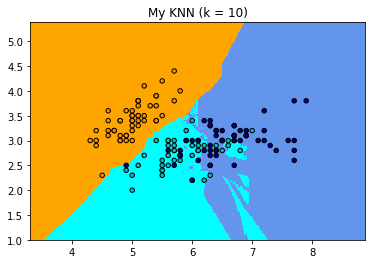

In [80]:
knn = KNNClassifier(n_neighbors)
knn.fit(X, y)

cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("My KNN (k = %i)"
          % (n_neighbors))

plt.show()

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=6)
knn1  = KNNClassifier(n_neighbors)
knn1.fit(x_train, y_train)
Z1 = knn.predict(x_test)
count = 0
print(Z1)
print(y_test)

for  i in range(len(Z1)):
    if Z1[i]  == y_test[i]:
        count  = count + 1
count/len(Z1)      


[0 2 0 0 2 1 2 0 2 1 1 1 2 2 2 1 2 2 1 0 0 2 0 0 1 2 2 2 0 1 0 1 0 0 2 2 1
 2]
[0 2 0 0 2 1 2 0 2 1 2 1 2 2 1 2 2 1 1 0 0 2 0 0 1 1 1 2 0 1 0 1 0 0 2 2 1
 2]


0.8421052631578947